1) Based on your analysis, what can you conclude about the behaviour or characteristics of users who complete check out vs those who do not?
	- More users do not check out
	- The average time spent for check out users are higher than do not check out
	- The average page visited of check out users are higher than do not check out
	- The average cart items of check out users are lower than do not check out
	- For Top 3 locations for check out users are location 4 > location1 >location 3, but for do not check out is location 4> location 3> location 5. So location 4 are having largest portion of users
	- For device, the distribution of devices are the same for both groups, with destop > mobile > Tablet
For cart value, the distribution of check out user is more normally distributed
2) How did you prepare your data for analysis? Describe your data cleaning and preparation approaches, and why these were the best choices.
I clean all the missing value and add an age group column
3) What recommendations do you have for the product team? What should they do next? Be specific (i.e., who should they target, why and how).
I recommend the company to focus more on increasing the patience of the users. As it shows that the longer the customer spent the higher the check out rate will be.

In [27]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# load data
df = pd.read_csv(r"C:\Users\Oscar_On\Downloads\midterm_data.csv")

In [54]:
# show first 5 rows
df.head(100)

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4
...,...,...,...,...,...,...,...,...,...,...
95,96,31,2,35.262923,7,10,72.19,1,Mobile,Location 1
96,97,39,1,27.370174,8,24,199.05,0,Desktop,Location 2
97,98,23,5,14.608444,3,7,52.85,0,Desktop,Location 4
98,99,59,4,9.226851,2,22,320.54,0,Desktop,Location 2


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


In [31]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


Datacleaning

In [32]:
# rows with missing value in both device and location
df[df['device'].isnull() & df['location'].isnull() ]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
2130,2131,20,5,21.841304,6,19,243.39,0,NaN,NaN


In [33]:
df.drop([2130], axis=0, inplace=True)

In [34]:
# drop duplicate rows
df.drop_duplicates(inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4999 non-null   int64  
 1   age              4999 non-null   int64  
 2   sessions         4999 non-null   int64  
 3   time_spent       4999 non-null   float64
 4   pages_visited    4999 non-null   int64  
 5   cart_items       4999 non-null   int64  
 6   cart_value       4999 non-null   float64
 7   checkout_status  4999 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.6+ KB


In [41]:
# Use the copy() function to make a copy of the DataFrame
df_test_1 = df.copy()

In [42]:
# drop all the rows with missing value
df_test_1 = df_test_1.dropna()

In [43]:
df_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4871 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4871 non-null   int64  
 1   age              4871 non-null   int64  
 2   sessions         4871 non-null   int64  
 3   time_spent       4871 non-null   float64
 4   pages_visited    4871 non-null   int64  
 5   cart_items       4871 non-null   int64  
 6   cart_value       4871 non-null   float64
 7   checkout_status  4871 non-null   int64  
 8   device           4871 non-null   object 
 9   location         4871 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 418.6+ KB


In [53]:
df.groupby('device').describe().describe(include='all')

userID                                                    
             count         mean          std       min          25%   
count     3.000000     3.000000     3.000000  3.000000     3.000000  \
mean   1633.333333  2511.503034  1448.306445  4.333333  1256.083333   
std     821.477531    27.237699    11.588567  3.055050    17.623375   
min     934.000000  2481.464933  1435.264432  1.000000  1236.750000   
25%    1181.000000  2499.956906  1443.749377  3.000000  1248.500000   
50%    1428.000000  2518.448880  1452.234322  5.000000  1260.250000   
75%    1983.000000  2526.522084  1454.827451  6.000000  1265.750000   
max    2538.000000  2534.595289  1457.420581  7.000000  1271.250000   

                                                      age             ...   
               50%          75%          max        count       mean  ...   
count     3.000000     3.000000     3.000000     3.000000   3.000000  ...  \
mean   2507.666667  3764.916667  4996.666667  1633.333333  41.636131  ...   
std       8.808140    38.354704     4.932883   821.477531   0.264348  ...   
min    2497.500000  3733.750000  4991.000000   934.000000  41.338849  ...   
25%    2505.000000  3743.500000  4995.000000  1181.000000  41.531820  ...   
50%    2512.500000  3753.250000  4999.000000  1428.000000  41.724790  ...   
75%    2512.750000  3780.500000  4999.500000  1983.000000  41.784772  ...   
max    2513.000000  3807.750000  5000.000000  2538.000000  41.844754  ...   

       cart_value             checkout_status                                 
              75%         max           count      mean       std  min  25%   
count    3.000000    3.000000        3.000000  3.000000  3.000000  3.0  3.0  \
mean   198.852500  397.786667     1633.333333  0.268263  0.442984  0.0  0.0   
std      2.398996   26.128761      821.477531  0.015532  0.007948  0.0  0.0   
min    197.245000  377.980000      934.000000  0.254818  0.435992  0.0  0.0   
25%    197.473750  382.980000     1181.000000  0.259762  0.438662  0.0  0.0   
50%    197.702500  387.980000     1428.000000  0.264706  0.441331  0.0  0.0   
75%    199.656250  407.690000     1983.000000  0.274985  0.446480  0.0  0.0   
max    201.610000  427.400000     2538.000000  0.285264  0.451629  0.0  0.0   

                      
       50%  75%  max  
count  3.0  3.0  3.0  
mean   0.0  1.0  1.0  
std    0.0  0.0  0.0  
min    0.0  1.0  1.0  
25%    0.0  1.0  1.0  
50%    0.0  1.0  1.0  
75%    0.0  1.0  1.0  
max    0.0  1.0  1.0  

[8 rows x 64 columns]

In [52]:
df_test_1.groupby('device').describe().describe()

userID                                                             
             count         mean          std       min          25%      50%   
count     3.000000     3.000000     3.000000  3.000000     3.000000     3.00  \
mean   1623.666667  2511.885524  1449.250951  4.333333  1254.166667  2508.00   
std     814.897744    25.874384    11.604669  3.055050    15.859408     8.50   
min     932.000000  2484.090801  1436.080284  1.000000  1236.000000  2499.50   
25%    1174.500000  2500.191484  1444.889585  3.000000  1248.625000  2503.75   
50%    1417.000000  2516.292167  1453.698885  5.000000  1261.250000  2508.00   
75%    1969.500000  2525.782886  1455.836285  6.000000  1263.250000  2512.25   
max    2522.000000  2535.273605  1457.973685  7.000000  1265.250000  2516.50   

                                         age             ...  cart_value   
               75%          max        count       mean  ...         75%   
count     3.000000     3.000000     3.000000   3.000000  ...    3.000000  \
mean   3767.000000  4996.666667  1623.666667  41.630280  ...  198.960833   
std      36.125649     4.932883   814.897744   0.290900  ...    2.444691   
min    3736.750000  4991.000000   932.000000  41.308882  ...  197.245000   
25%    3747.000000  4995.000000  1174.500000  41.507652  ...  197.561250   
50%    3757.250000  4999.000000  1417.000000  41.706422  ...  197.877500   
75%    3782.125000  4999.500000  1969.500000  41.790979  ...  199.818750   
max    3807.000000  5000.000000  2522.000000  41.875536  ...  201.760000   

                  checkout_status                                               
              max           count      mean       std  min  25%  50%  75%  max  
count    3.000000        3.000000  3.000000  3.000000  3.0  3.0  3.0  3.0  3.0  
mean   397.786667     1623.666667  0.268263  0.442986  0.0  0.0  0.0  1.0  1.0  
std     26.128761      814.897744  0.015520  0.007922  0.0  0.0  0.0  0.0  0.0  
min    377.980000      932.000000  0.255365  0.436300  0.0  0.0  0.0  1.0  1.0  
25%    382.980000     1174.500000  0.259651  0.438611  0.0  0.0  0.0  1.0  1.0  
50%    387.980000     1417.000000  0.263938  0.440922  0.0  0.0  0.0  1.0  1.0  
75%    407.690000     1969.500000  0.274713  0.446329  0.0  0.0  0.0  1.0  1.0  
max    427.400000     2522.000000  0.285488  0.451736  0.0  0.0  0.0  1.0  1.0  

[8 rows x 64 columns]

Further look at cart_value

In [64]:
df.groupby('device')['cart_value'].describe().describe(include='all')

,count,mean,std,min,25%,50%,75%,max
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,1633.333333,149.254990,69.046050,26.103333,91.790000,143.050000,198.852500,397.786667
std,821.477531,1.864262,1.127775,5.001613,4.009305,2.058737,2.398996,26.128761
min,934.000000,147.336199,68.126224,20.410000,87.210000,140.850000,197.245000,377.980000
25%,1181.000000,148.352755,68.416933,24.260000,90.352500,142.110000,197.473750,382.980000
50%,1428.000000,149.369310,68.707642,28.110000,93.495000,143.370000,197.702500,387.980000
75%,1983.000000,150.214386,69.505963,28.950000,94.080000,144.150000,199.656250,407.690000
max,2538.000000,151.059461,70.304283,29.790000,94.665000,144.930000,201.610000,427.400000


In [63]:
df_test_1.groupby('device')['cart_value'].describe().describe(include='all')

,count,mean,std,min,25%,50%,75%,max
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,1623.666667,149.268983,69.133634,26.103333,91.605000,142.930000,198.960833,397.786667
std,814.897744,1.849101,1.088127,5.001613,3.610613,2.065163,2.444691,26.128761
min,932.000000,147.408498,68.236604,20.410000,87.450000,140.850000,197.245000,377.980000
25%,1174.500000,148.350232,68.528416,24.260000,90.417500,141.905000,197.561250,382.980000
50%,1417.000000,149.291967,68.820227,28.110000,93.385000,142.960000,197.877500,387.980000
75%,1969.500000,150.199226,69.582148,28.950000,93.682500,143.970000,199.818750,407.690000
max,2522.000000,151.106486,70.344070,29.790000,93.980000,144.980000,201.760000,427.400000


No dratically change in mean of cart value

In [61]:
df.groupby('location').describe().describe(include='all')

userID                                                    
             count         mean          std       min          25%   
count     5.000000     5.000000     5.000000  5.000000     5.000000  \
mean    994.000000  2501.605762  1443.315972  3.200000  1254.150000   
std      41.635322    61.781274    22.382001  1.923538    96.032156   
min     950.000000  2428.888662  1413.792983  1.000000  1115.000000   
25%     971.000000  2477.388560  1434.875326  2.000000  1219.500000   
50%     979.000000  2495.070526  1437.144060  3.000000  1248.250000   
75%    1014.000000  2508.631629  1460.439111  4.000000  1335.500000   
max    1056.000000  2598.049434  1470.328379  6.000000  1352.500000   

                                                      age             ...   
               50%          75%          max        count       mean  ...   
count     5.000000     5.000000     5.000000     5.000000   5.000000  ...  \
mean   2501.600000  3743.000000  4997.800000   994.000000  41.536264  ...   
std     108.399377    76.283189     1.923538    41.635322   0.559226  ...   
min    2378.500000  3674.000000  4995.000000   950.000000  40.892992  ...   
25%    2431.000000  3683.500000  4997.000000   971.000000  41.085479  ...   
50%    2517.000000  3712.500000  4998.000000   979.000000  41.648421  ...   
75%    2517.500000  3796.000000  4999.000000  1014.000000  41.763314  ...   
max    2664.000000  3849.000000  5000.000000  1056.000000  42.291113  ...   

       cart_value             checkout_status                                 
              75%         max           count      mean       std  min  25%   
count    5.000000    5.000000        5.000000  5.000000  5.000000  5.0  5.0  \
mean   198.332000  378.548000      994.000000  0.272285  0.445236  0.0  0.0   
std      1.811798   31.921718       41.635322  0.010478  0.005322  0.0  0.0   
min    195.440000  353.800000      950.000000  0.261341  0.439582  0.0  0.0   
25%    197.780000  357.770000      971.000000  0.266316  0.442264  0.0  0.0   
50%    198.947500  359.000000      979.000000  0.266735  0.442481  0.0  0.0   
75%    199.542500  394.770000     1014.000000  0.282942  0.450659  0.0  0.0   
max    199.950000  427.400000     1056.000000  0.284091  0.451194  0.0  0.0   

                      
       50%  75%  max  
count  5.0  5.0  5.0  
mean   0.0  1.0  1.0  
std    0.0  0.0  0.0  
min    0.0  1.0  1.0  
25%    0.0  1.0  1.0  
50%    0.0  1.0  1.0  
75%    0.0  1.0  1.0  
max    0.0  1.0  1.0  

[8 rows x 64 columns]

In [60]:
df_test_1.groupby('location').describe().describe()

userID                                                    
             count         mean          std       min          25%   
count     5.000000     5.000000     5.000000  5.000000     5.000000  \
mean    974.200000  2503.556711  1444.702301  3.200000  1251.850000   
std      38.603109    61.736258    20.409409  1.923538    89.991597   
min     936.000000  2434.086957  1418.129354  1.000000  1117.500000   
25%     943.000000  2477.844689  1437.014417  2.000000  1226.250000   
50%     966.000000  2486.351496  1437.946509  3.000000  1251.500000   
75%     998.000000  2520.083658  1462.552754  4.000000  1311.500000   
max    1028.000000  2599.416755  1467.868470  6.000000  1352.500000   

                                                      age             ...   
               50%          75%          max        count       mean  ...   
count     5.000000     5.000000     5.000000     5.000000   5.000000  ...  \
mean   2504.600000  3750.800000  4997.800000   974.200000  41.536747  ...   
std     107.547315    81.362115     1.923538    38.603109   0.576350  ...   
min    2378.500000  3672.000000  4995.000000   936.000000  40.925097  ...   
25%    2434.000000  3692.750000  4997.000000   943.000000  41.058324  ...   
50%    2511.500000  3716.000000  4998.000000   966.000000  41.547009  ...   
75%    2539.000000  3814.750000  4999.000000   998.000000  41.809619  ...   
max    2660.000000  3858.500000  5000.000000  1028.000000  42.343685  ...   

       cart_value             checkout_status                                 
              75%         max           count      mean       std  min  25%   
count    5.000000    5.000000        5.000000  5.000000  5.000000  5.0  5.0  \
mean   198.498000  378.548000      974.200000  0.273330  0.445826  0.0  0.0   
std      1.808247   31.921718       38.603109  0.007986  0.004036  0.0  0.0   
min    195.440000  353.800000      936.000000  0.265531  0.441837  0.0  0.0   
25%    198.550000  357.770000      943.000000  0.267094  0.442678  0.0  0.0   
50%    199.010000  359.000000      966.000000  0.270414  0.444409  0.0  0.0   
75%    199.325000  394.770000      998.000000  0.280538  0.449495  0.0  0.0   
max    200.165000  427.400000     1028.000000  0.283074  0.450711  0.0  0.0   

                      
       50%  75%  max  
count  5.0  5.0  5.0  
mean   0.0  1.0  1.0  
std    0.0  0.0  0.0  
min    0.0  1.0  1.0  
25%    0.0  1.0  1.0  
50%    0.0  1.0  1.0  
75%    0.0  1.0  1.0  
max    0.0  1.0  1.0  

[8 rows x 64 columns]

In [65]:
df.groupby('location')['cart_value'].describe().describe(include='all')

,count,mean,std,min,25%,50%,75%,max
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,994.000000,149.447622,68.797859,26.814000,92.512000,143.413000,198.332000,378.548000
std,41.635322,2.219531,0.736828,3.941552,2.292251,4.811526,1.811798,31.921718
min,950.000000,147.610779,67.856062,20.410000,89.820000,139.435000,195.440000,353.800000
25%,971.000000,147.753627,68.340627,25.840000,91.460000,140.245000,197.780000,357.770000
50%,979.000000,149.254958,68.959756,28.110000,92.502500,141.375000,198.947500,359.000000
75%,1014.000000,149.507662,69.039490,29.790000,92.712500,144.810000,199.542500,394.770000
max,1056.000000,153.111083,69.793360,29.920000,96.065000,151.200000,199.950000,427.400000


In [66]:
df_test_1.groupby('location')['cart_value'].describe().describe()

,count,mean,std,min,25%,50%,75%,max
count,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000
mean,974.200000,149.497250,68.803153,26.814000,92.70300,143.238000,198.498000,378.548000
std,38.603109,2.171723,0.782380,3.941552,2.05531,4.817477,1.808247,31.921718
min,936.000000,147.568424,67.778958,20.410000,89.82000,139.525000,195.440000,353.800000
25%,943.000000,147.684780,68.411761,25.840000,92.58500,139.575000,198.550000,357.770000
50%,966.000000,149.232628,68.874742,28.110000,92.71250,141.120000,199.010000,359.000000
75%,998.000000,150.127911,69.064044,29.790000,92.76750,145.150000,199.325000,394.770000
max,1028.000000,152.872505,69.886260,29.920000,95.63000,150.820000,200.165000,427.400000


In [69]:
missing_data = df.isnull().sum()
missing_data

userID              0
age                 0
sessions            0
time_spent          0
pages_visited       0
cart_items          0
cart_value          0
checkout_status     0
device             99
location           29
dtype: int64

In [70]:
(99+29)/4999

0.02560512102420484

Dropping all the missing value is just droping 2.5% of the data therefore I drop all the missing value rows

In [67]:
df_clean = df.dropna()

In [68]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4871 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4871 non-null   int64  
 1   age              4871 non-null   int64  
 2   sessions         4871 non-null   int64  
 3   time_spent       4871 non-null   float64
 4   pages_visited    4871 non-null   int64  
 5   cart_items       4871 non-null   int64  
 6   cart_value       4871 non-null   float64
 7   checkout_status  4871 non-null   int64  
 8   device           4871 non-null   object 
 9   location         4871 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 418.6+ KB


<Axes: xlabel='checkout_status', ylabel='Count'>

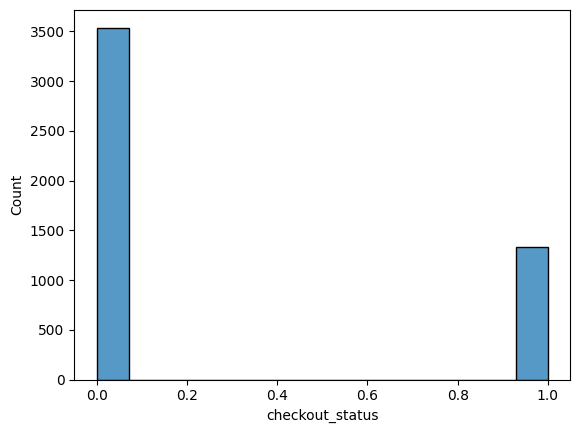

In [75]:
sns.histplot(data = df_clean, x = 'checkout_status')

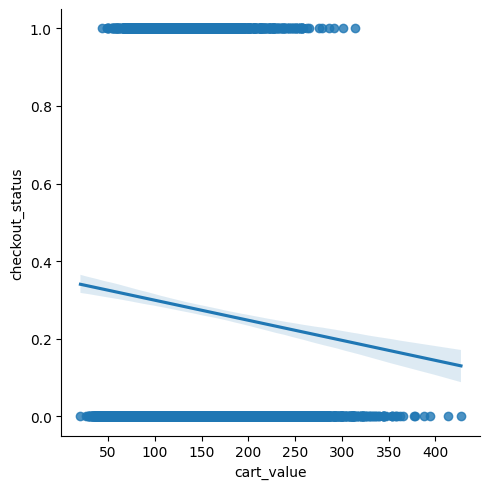

In [99]:
sns.lmplot(data = df_clean, x='cart_value', y='checkout_status')

There 

Age analysis

In [87]:
# Create function to classify age group
def age_gp(x):
    if x >= 0 and x < 20:
        return '0-20'
    elif x >= 20 and x < 30:
        return '20-30'
    elif x >= 30 and x < 40:
        return '30-40'
    elif x >= 40 and x < 50:
        return '40-50'
    elif x >= 50 and x < 60:
        return '50-60'
    else:
        return '60+'

In [88]:
# Create new column with rental count range using total_cat() function created above
df_clean['age_group'] = df_clean['age'].apply(age_gp)

C:\Users\Oscar_On\AppData\Local\Temp\ipykernel_2584\3594724784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['age_group'] = df_clean['age'].apply(age_gp)


In [89]:
df_clean.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location,age_group
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1,60+
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3,60+
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4,0-20
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2,20-30
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4,20-30


In [90]:
check_out = df_clean[df_clean['checkout_status']== 1]

dont_check_out = df_clean[df_clean['checkout_status']== 0]

<Axes: xlabel='age_group', ylabel='Count'>

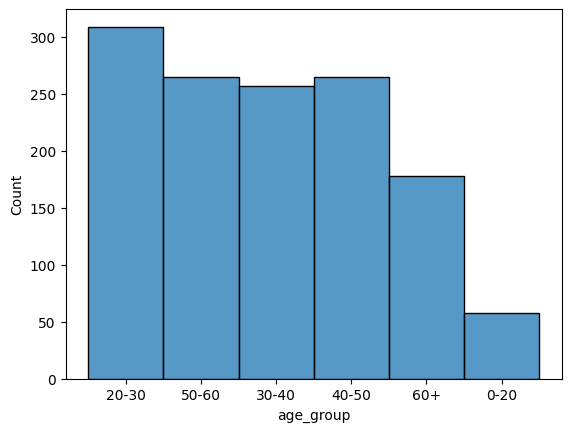

In [92]:
sns.histplot(check_out['age_group'], bins=5)

<Axes: xlabel='age_group', ylabel='Count'>

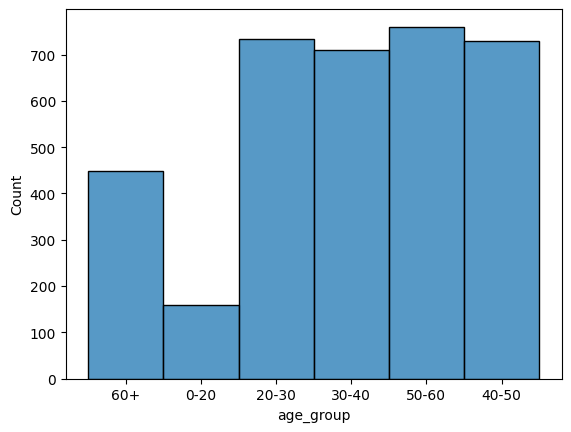

In [91]:
sns.histplot(dont_check_out['age_group'], bins=5)

Cart Value

In [121]:
check_out_cv_mean = check_out['cart_value'].mean()

dont_check_out_cv_mean = dont_check_out['cart_value'].mean()

print(check_out_cv_mean, dont_check_out_cv_mean)

140.51087087087086 152.82748516530097


<Axes: xlabel='cart_value', ylabel='Count'>

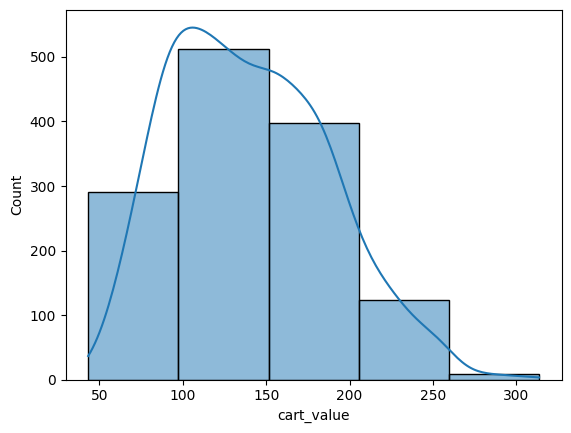

In [94]:
sns.histplot(check_out['cart_value'], bins=5,kde=True)

<Axes: xlabel='cart_value', ylabel='Count'>

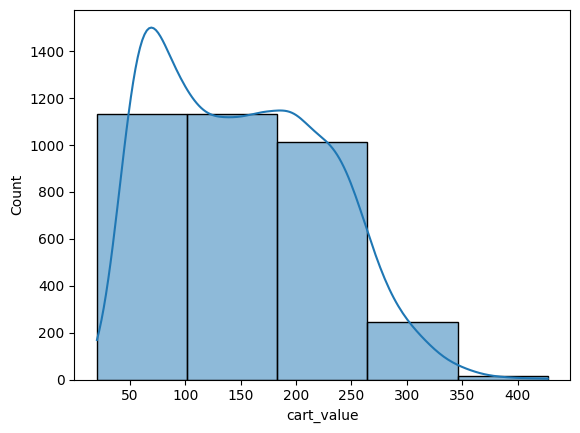

In [96]:
sns.histplot(dont_check_out['cart_value'], bins=5,kde=True)

Group 20-30 is having the highest number of check out

Device

<Axes: xlabel='device', ylabel='Count'>

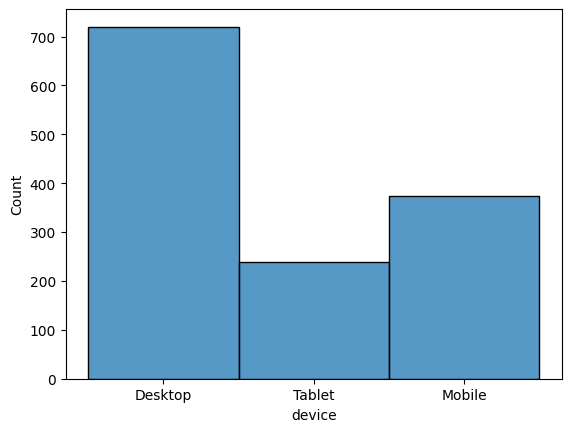

In [119]:
sns.histplot(check_out['device'], bins=2)

<Axes: xlabel='device', ylabel='Count'>

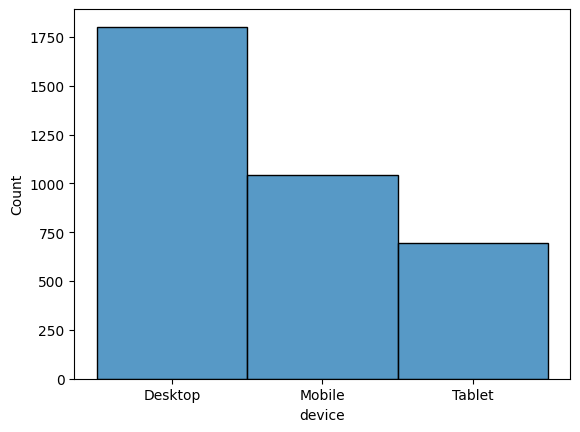

In [120]:
sns.histplot(dont_check_out['device'], bins=2)

Location

<Axes: xlabel='location', ylabel='Count'>

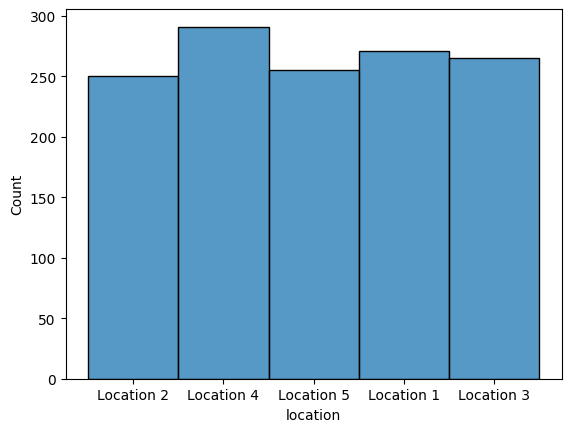

In [104]:
sns.histplot(check_out['location'], bins=5)

<Axes: xlabel='location', ylabel='Count'>

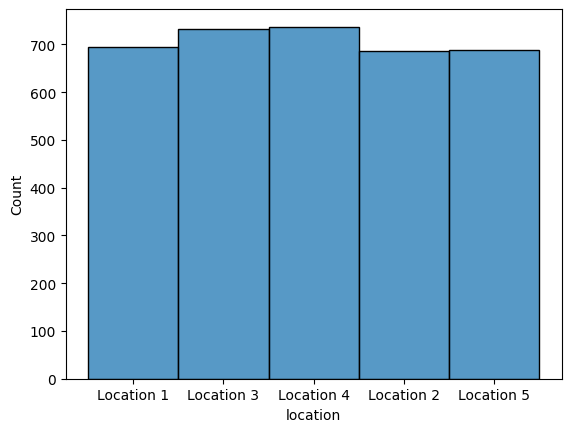

In [105]:
sns.histplot(dont_check_out['location'], bins=5)

Time spent

In [116]:
check_out_ts_mean = check_out['time_spent'].mean()

dont_check_out_ts_mean = dont_check_out['time_spent'].mean()

print(check_out_ts_mean, dont_check_out_ts_mean)

31.318157090728228 22.858776587328904


Page visited

In [117]:
check_out_pv_mean = check_out['pages_visited'].mean()

dont_check_out_pv_mean = dont_check_out['pages_visited'].mean()

print(check_out_pv_mean, dont_check_out_pv_mean)

7.28978978978979 5.208250918338513


Cart items

In [118]:
check_out_ci_mean = check_out['cart_items'].mean()

dont_check_out_ci_mean = dont_check_out['cart_items'].mean()

print(check_out_ci_mean, dont_check_out_ci_mean)

14.096846846846846 15.300367335405483


Session

<Axes: xlabel='sessions', ylabel='Count'>

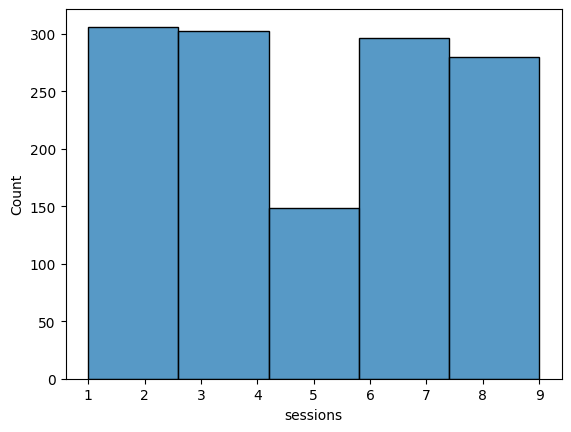

In [132]:
sns.histplot(check_out['sessions'], bins=5)

<Axes: xlabel='sessions', ylabel='Count'>

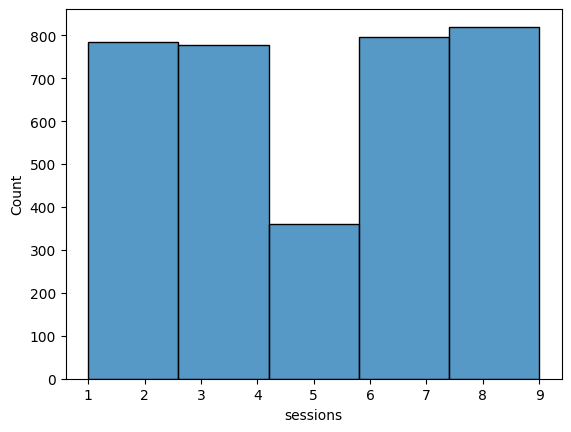

In [125]:
sns.histplot(dont_check_out['sessions'], bins=5)

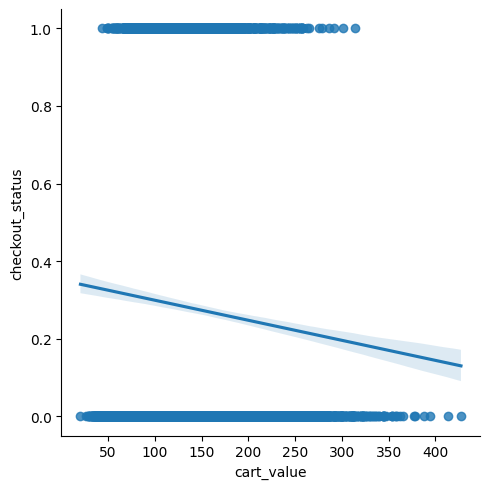

In [126]:
sns.lmplot(data = df_clean, x='cart_value', y='checkout_status')

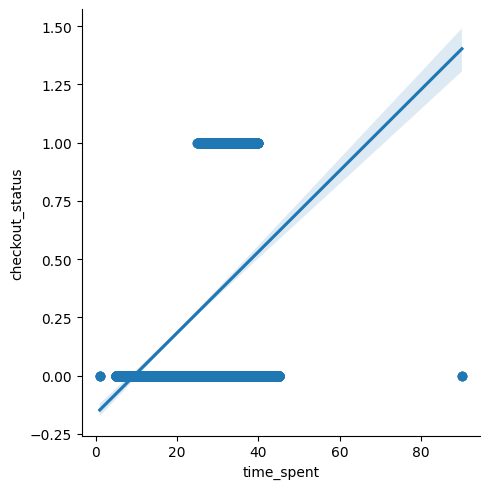

In [127]:
sns.lmplot(data = df_clean, x='time_spent', y='checkout_status')

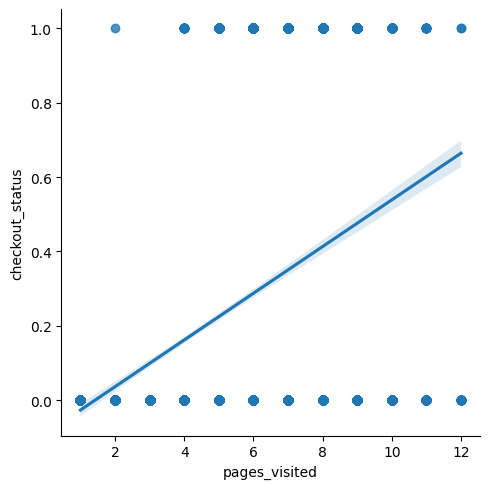

In [128]:
sns.lmplot(data = df_clean, x='pages_visited', y='checkout_status')